Found 1800 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/5
57/57 [==============================] - 67s 1s/step - loss: 1.1705 - accuracy: 0.4894 - val_loss: 0.8886 - val_accuracy: 0.6133
Epoch 2/5
57/57 [==============================] - 65s 1s/step - loss: 0.8266 - accuracy: 0.6261 - val_loss: 0.9898 - val_accuracy: 0.5778
Epoch 3/5
57/57 [==============================] - 62s 1s/step - loss: 0.7512 - accuracy: 0.6606 - val_loss: 0.8247 - val_accuracy: 0.6622
Epoch 4/5
57/57 [==============================] - 62s 1s/step - loss: 0.6501 - accuracy: 0.7233 - val_loss: 0.8342 - val_accuracy: 0.6600
Epoch 5/5
57/57 [==============================] - 62s 1s/step - loss: 0.4789 - accuracy: 0.8122 - val_loss: 0.9053 - val_accuracy: 0.6511
Epoch 1/5
57/57 [==============================] - 142s 2s/step - loss: 2.3575 - accuracy: 0.4544 - val_loss: 0.9759 - val_accuracy: 0.4667
Epoch 2/5
57/57 [========================

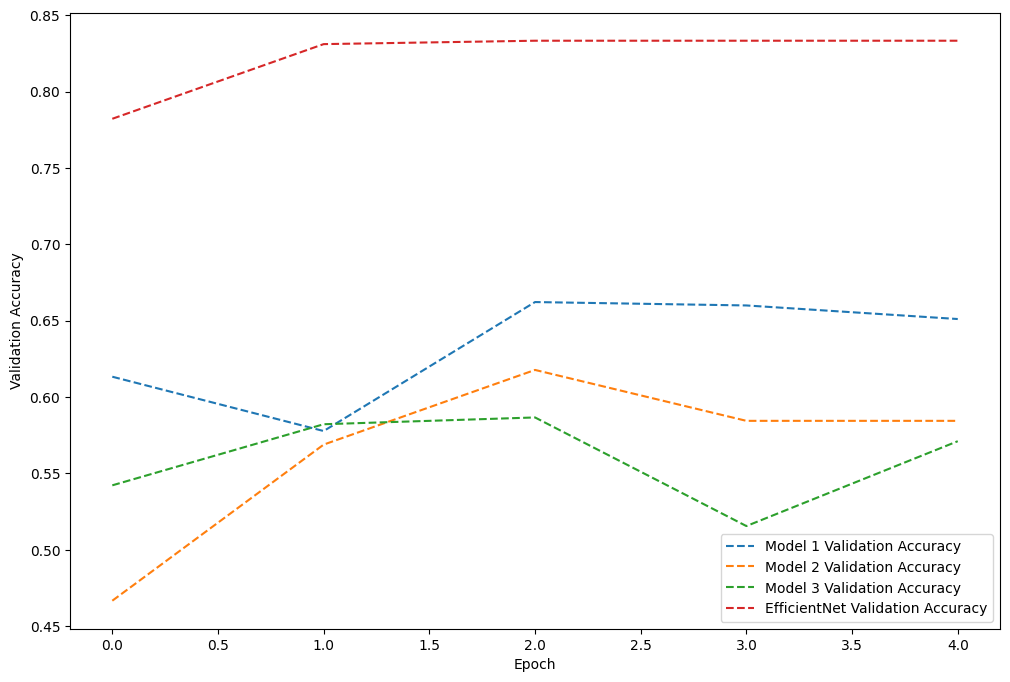

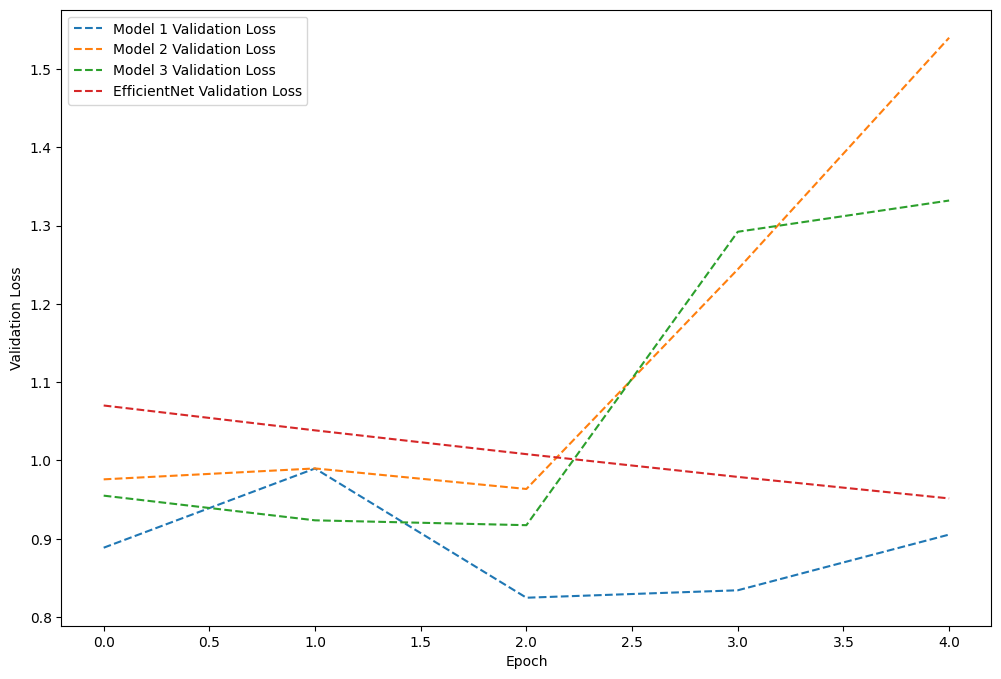

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow_hub as hub
import time

# Завдання 1: Вибір Класів
selected_classes = ['pizza', 'steak', 'sushi']

# Завдання 2: Попередня Обробка

# Шляхи до папок тренувального та тестового наборів
train_dir = './train'
test_dir = './test'

# Розміри зображень та інші параметри попередньої обробки
image_size = (224, 224)
batch_size = 32

# Попередня обробка даних та створення генераторів
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes
)

# Завдання 3: Розробка та Тренування Моделей

# Модель 1
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Модель 2 (змінюємо архітектуру)
model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Модель 3 (змінюємо кількість шарів)
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Компіляція моделей
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування та оцінка моделей
epochs = 5
history1 = model1.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history2 = model2.fit(train_generator, epochs=epochs, validation_data=validation_generator)
history3 = model3.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Оцінка моделей на тестовому наборі
test_loss1, test_accuracy1 = model1.evaluate(test_generator)
test_loss2, test_accuracy2 = model2.evaluate(test_generator)
test_loss3, test_accuracy3 = model3.evaluate(test_generator)

# Запис результатів
print(f'Model 1 - Test Accuracy: {test_accuracy1 * 100:.2f}%')
print(f'Model 2 - Test Accuracy: {test_accuracy2 * 100:.2f}%')
print(f'Model 3 - Test Accuracy: {test_accuracy3 * 100:.2f}%')

# Завдання 5: Додаткове Завдання (Transfer Learning з використанням EfficientNet)

# Завантаження EfficientNet
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/classification/1'
efficientnet_model = tf.keras.Sequential([
    hub.KerasLayer(efficientnet_url, trainable=False),
    tf.keras.layers.Dense(len(selected_classes), activation='softmax')
])

# Компіляція та тренування EfficientNet моделі
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
efficientnet_history = efficientnet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
end_time = time.time()

# Оцінка моделі на тестовому наборі
test_loss_efficientnet, test_accuracy_efficientnet = efficientnet_model.evaluate(test_generator)

# Запис та порівняння результатів
print(f'EfficientNet - Test Accuracy: {test_accuracy_efficientnet * 100:.2f}%')
print(f'EfficientNet - Training Time: {end_time - start_time:.2f} seconds')

# Порівняння графіків точності та втрат для всіх моделей
plt.figure(figsize=(12, 8))
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='dashed')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='dashed')
plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy', linestyle='dashed')
plt.plot(efficientnet_history.history['val_accuracy'], label='EfficientNet Validation Accuracy', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss', linestyle='dashed')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', linestyle='dashed')
plt.plot(history3.history['val_loss'], label='Model 3 Validation Loss', linestyle='dashed')
plt.plot(efficientnet_history.history['val_loss'], label='EfficientNet Validation Loss', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()
